Метрики для каждой целевой переменной:

F6:
MAE: 14.245
RMSE: 22.242
R²: 0.85

F9:
MAE: 0.92
RMSE: 1.833
R²: 0.906

Время выполнения: 158.48 секунд


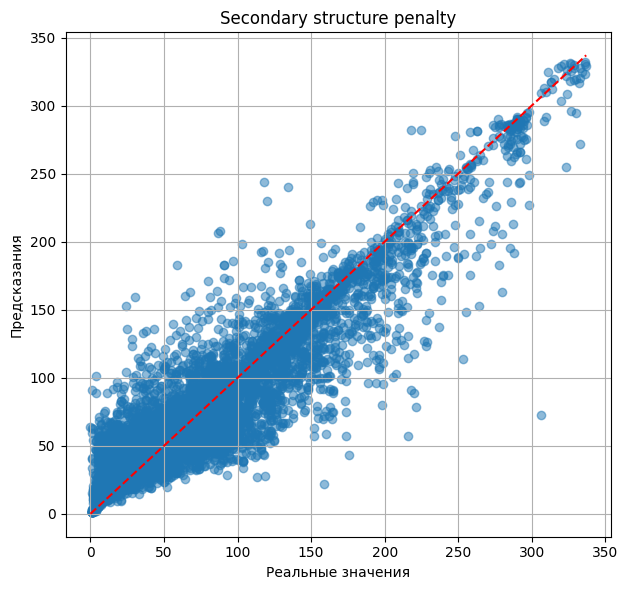

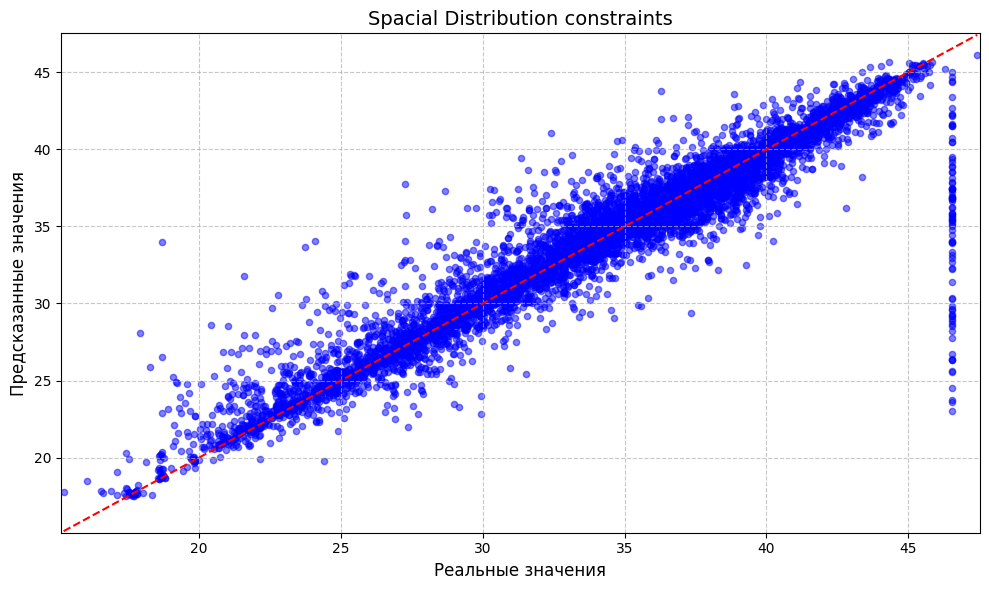

In [1]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Загрузка данных
file_path = 'CASP.csv'  # Убедитесь, что файл находится в текущей директории или укажите полный путь
df = pd.read_csv(file_path)

# Выбор признаков и целевых переменных
X = df.drop(columns=['F8', 'F9'])  # Все признаки, кроме целевых F8 и F9
y = df[['F8', 'F9']]               # Целевые переменные F8 и F9

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели Random Forest
start_time = time.time()
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
end_time = time.time()

# Предсказание на тестовых данных
y_pred = model.predict(X_test)

# Вычисление метрик для каждой целевой переменной
metrics = {}
for i, target in enumerate(['F6', 'F9']):
    mae = mean_absolute_error(y_test.iloc[:, i], y_pred[:, i])
    rmse = np.sqrt(mean_squared_error(y_test.iloc[:, i], y_pred[:, i]))
    r2 = r2_score(y_test.iloc[:, i], y_pred[:, i])
    
    metrics[target] = {
        'MAE': round(mae, 3),
        'RMSE': round(rmse, 3),
        'R²': round(r2, 3)
    }

# Вывод метрик
print("Метрики для каждой целевой переменной:")
for target, values in metrics.items():
    print(f"\n{target}:")
    print(f"MAE: {values['MAE']}")
    print(f"RMSE: {values['RMSE']}")
    print(f"R²: {values['R²']}")

# Время работы
print(f"\nВремя выполнения: {round(end_time - start_time, 2)} секунд")

# Визуализация реальных vs предсказанных значений
plt.figure(figsize=(12, 6))
targets = ['F8']

for i, target in enumerate(targets):
    plt.subplot(1, 2, i+1)
    plt.scatter(y_test.iloc[:, i], y_pred[:, i], alpha=0.5)
    plt.plot([y_test.min().min(), y_test.max().max()], 
             [y_test.min().min(), y_test.max().max()], 'r--')
    plt.xlabel('Реальные значения')
    plt.ylabel('Предсказания')
    plt.title('Secondary structure penalty')
    plt.grid(True)

plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 6))

# Выбираем индекс F9 (второй столбец в y)
targets = ['F8','F9']
target_index = 1 

# Получаем реальные и предсказанные значения для F9
y_true_f9 = y_test.iloc[:, target_index]
y_pred_f9 = y_pred[:, target_index]

# Строим scatter plot
plt.scatter(y_true_f9, y_pred_f9, alpha=0.5, s=20, color='blue')

# Добавляем линию идеальных предсказаний
min_val = min(y_true_f9.min(), y_pred_f9.min())
max_val = max(y_true_f9.max(), y_pred_f9.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=1.5)

# Настраиваем оси и подписи
plt.xlabel('Реальные значения', fontsize=12)
plt.ylabel('Предсказанные значения', fontsize=12)
plt.title('Spacial Distribution constraints', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Устанавливаем одинаковые пределы для осей
plt.xlim(min_val - 0.1, max_val + 0.1)
plt.ylim(min_val - 0.1, max_val + 0.1)

# Добавляем текстовый бокс с метриками


plt.tight_layout()
plt.show()